# Best Place for Children in Toronto!

I am Kevin Huang. The notebook is for the final project of the Coursera course - Applied Data Science Capstone. The topic is __Best Place for Children in Toronto!__

## Introduction

For newcomers to Toronto that have many children, the most important things is to make sure their sons/daughters have enough spaces to play and have places to eat together. For example, living in a neighborhoods with many __parks__, __trails__, and __playgrounds__ nearby is ideal for such families. With the clustering approach, the goal of this project is to find the recommended neighborhoods for them so that the children living in Toronto can grow up happily!

## Business Problems

### 1. How to define a neighborhood favorable for children?

### 2. Which neighborhood in Toronto has the most places for children to play?

### 3. Which neighborhood in Toronto has the most places for the whole family to eat together?

## Data

The data analysis here is an extension of __Lab: Segmenting and Clustering Neighborhoods in the city of Toronto, Canada__. Hence, the required datasets is the same as the lab.


### 1. Wikipedia page that lists the neighborhoods in Toronto
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Use *BeautifulSoup* to scrap the neighborhood list in Toronto. The list contains information of the postal code, the borough, and the neighborhood name. 

The postal codes without corresponding neighborhoods will be excluded from this project.


### 2. Geospatial data of Toronto neighborhoods
http://cocl.us/Geospatial_data

For each neighborhood, find the longitude / latitude values so that we can use Foursquare location data to find nearby venues.


### 3. Foursquare location data to search for venues nearby each Toronto neighborhood

For each neighborhood, use the location data to search for nearby (1km) __venues__ and their corresponding __venue categories__.

## Methodology

### 1. Prepare the dataset for Foursquare queries
From the wiki page and the geospatial data mentioned above, construct a dataframe consisting of the neighborhood name and their corresponding latitude / longitude.


### 2. Feature each neighborhood with its common venues
Use Foursquare data to find all the venues that are < 1km to the neighborhood location. Group them up by the venue cateorgory. After that, record the frequency of each venue category and list the top 5 common venues for each neighborhood.


### 3. Use k-means model to cluster the neighborhoods
The features of the k-means model are the frequency of each venue category. Tune the model parameters until some clusters suitable for children are found.


### 4. Visualize the clusters and characterize them with common venue categories 
After the clustering result becomes satisfying, the distribution of every neighborhood cluster will be marked on the Toronto map with Folium module. The characteristics of each cluster will also be described in terms of the common venue categories.


### 5. Answer the business problems and give suggestions for newcomer families to Toronto
Define the children-favorable neighborhood, and classify such neighborhoods according to the potential needs of children. Finally, given the children's interest, a suggestion of the optimal neighborhoods can be made.


## Results

Using the k-means model, 100 of the 103 sets of Toronto neighborhoods are divided into 10 clusters. 3 of them are treated as outliers. Their spatial location are shown in the following map.

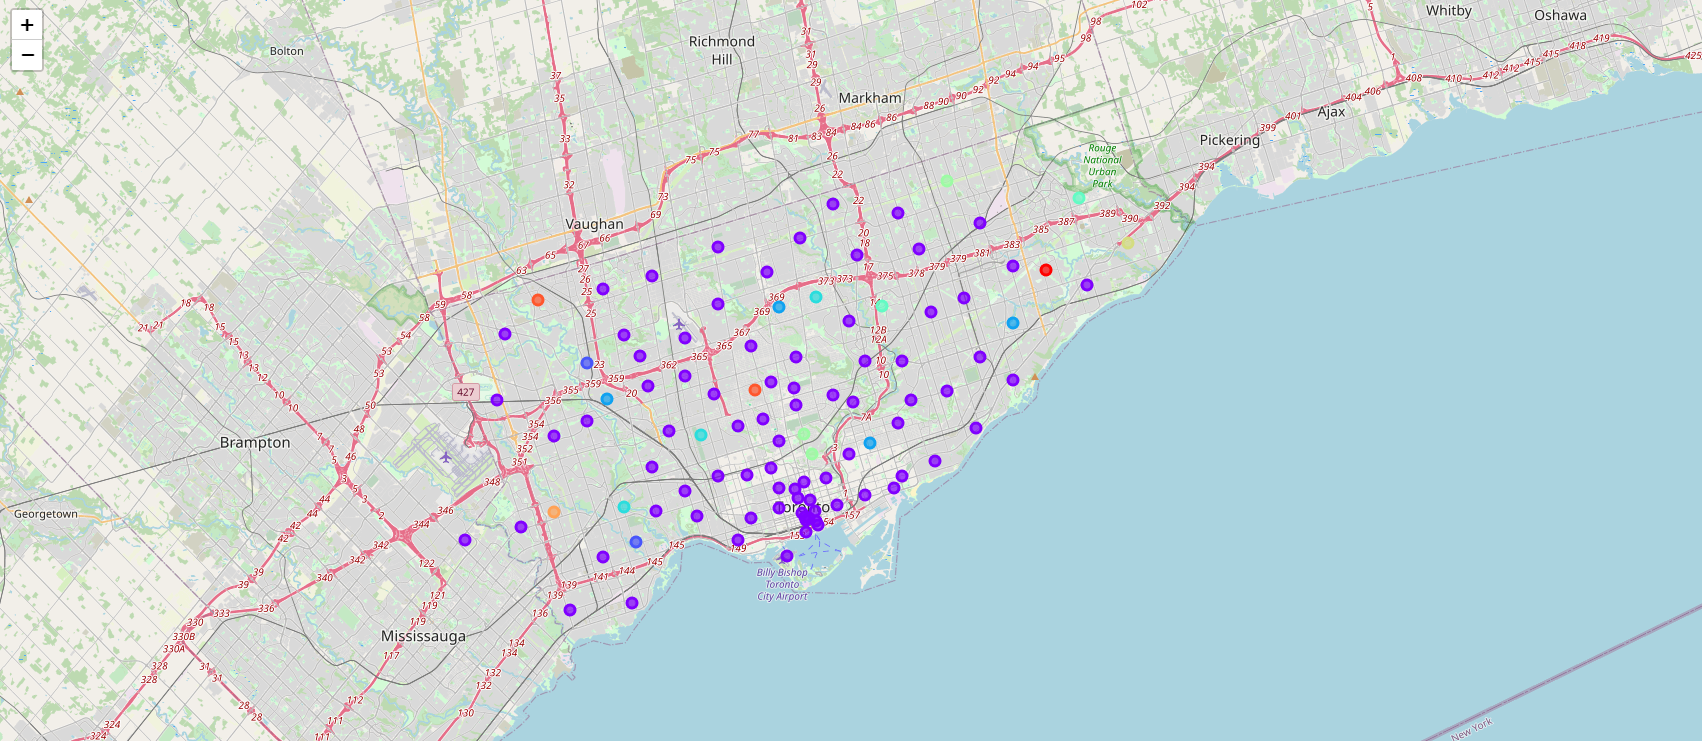

For each cluster, the most common venue categories are shown in the following table.

Cluster Label | Description
--- | ---
0 | Coffee shop and soccer field
1 | Coffee shops / Café and various types of restaurant, also include gyms and pubs if such venues exist
2 | Baseball field
3 | Park and convenience store
4 | Park and pool / river
5 | Park, playground, and fast food restaurant
6 | Tennis court, park, and playground
7 | Museum
8 | Golf course
9 | Home service, garden, and music store

According to the interests of the children, one can now suggest families the good places to live in Toronto.

## Discussion

Let's answer the business problems.

### 1. How to define a neighborhood favorable for children?
The definition of a children-favorable neighborhood is given by the inclusion of children-favorable venue categories in the top 5 common venue categories. The example of such categories are __park, playgournd, fields, courts, pool, and fast food restaurant__.


### 2. Which neighborhood in Toronto has the most places for children to play?
__Cluster 5__ has the most parks and playgrounds. The corresponding neighborhoods are __Malvern, Rouge, and Parkwoods__. If the child has favorite sports like soccer, baseball, or tennis, the optimal neighborhoods should be ones in __Cluster 0__, __Cluster 2__, or __Cluster 6__, respectively.


### 3. Which neighborhood in Toronto has the most places for the whole family to eat together?
Neighborhoods in __Cluster 1 without bars or pubs nearby__ should be good. Among the 81 neighborhoods in Cluster 1, __the ones near the Cluster 5 neighborhood__ are strongly recommended since the children can enjoy food after having fun playing in the park or playgrounds.


Based on the __interests of the children__, the optimal cluster, and thus, optimal neighborhoods can be suggested to the clients!

## Conclusion

The following table shows the optimal neighborhoods given the child's favorite activities. Based on the table, one can easily find out the best neighborhoods to move in and enjoy the life with their children!

Children's favorite activities | Recommended neighborhoods in Toronto
--- | ---
Soccer Ball | Woburn
Baseball | Humberlea, Emery, Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East
Swimming | The Kingsway, Montgomery Road, Old Mill North, York Mills, Silver Hills, Caledonia-Fairbanks 
Jogging | Malvern, Rouge, Parkwoods
Slide and swing | Malvern, Rouge, Parkwoods 
Eat fastfood | Malvern, Rouge, Parkwoods 
Tennis | Milliken, Agincourt North, Steeles East, L'Amoreaux East, Rosedale, Moore Park, Summerhill East 
Go to an exhibition | Rouge Hill, Port Union, Highland Creek

## The Codes for this Project

### Part 1 - Deal with the Wikipedia Table

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Request data from the Wikipeida page. Use BeautifulSoup to get the html content, and apply __soup.find__ to get the part corresponding to the target table.

In [4]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
req = requests.get(url)
soup = BeautifulSoup(req.text, "html5lib")
data = soup.find(class_="wikitable sortable")

Define a new dataframe __neighborhoods__ with the desired columns.

In [16]:
column_names = ['Postal Code', 'Borough', 'Neighborhood']
neighborhoods = pd.DataFrame(columns=column_names)

Extract data of the table row by row. For each row, I record data into dataframe only if the corresponding borough is assigned.

When the loop reaches the end of the table, __the postal code on next line__ is no longer a string of 3 characters, indicating the end of data recording.

In [17]:
header = data.findChild("tr")
dataline = header.find_next('tr')

while True:
    post0 = dataline.find_next('td')
    post = post0.get_text(strip=True) 
    
    bor0 = post0.find_next('td')
    bor = bor0.get_text(strip=True)
    # skip the data whose borough is not assigned     
    if bor != 'Not assigned':
        neigh0 = bor0.find_next('td')
        neigh = neigh0.get_text(strip=True)
            
        neighborhoods = neighborhoods.append({'Postal Code': post,
                                              'Borough': bor,
                                              'Neighborhood': neigh}, ignore_index=True)
    dataline = dataline.find_next('tr') 
    post_check = dataline.find_next('td').get_text(strip=True)
    # reach the end of the table
    if len(post_check) != 3:
        break

The first ten rows of the dataframe __neighborhoods__:

In [18]:
neighborhoods.head(10)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


The row count of the dataframe __neighborhoods__:

In [19]:
print('The number of rows in the dataframe: ',neighborhoods.shape[0])

The number of rows in the dataframe:  103


### Part 2 - Add Latitude and Longitude 

Read the latitude and the longitude values from the csv file.

In [20]:
latlon = pd.read_csv('http://cocl.us/Geospatial_data')
latlon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Sort the __neighborhoods__ dataframe from Part 1 by postal code.

In [21]:
neighborhoods.sort_values(by='Postal Code', inplace=True)
neighborhoods.reset_index(drop=True, inplace=True)

Concatenate 2 dataframes. Also record the postal code information in __latlon__ and rename it as *Postal Code1* column.

In [22]:
neighborhoods[['Postal Code1', 'Latitude', 'Longitude']] = latlon[latlon.columns.tolist()]
neighborhoods.head()

,Postal Code,Borough,Neighborhood,Postal Code1,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


Check if Postal Code of the 2 dataframes are identical. 

The output is True. The 2 dataframes are properly concatenated.

In [23]:
# check if Postal Code of the 2 dataframes are identical
sum(neighborhoods['Postal Code'] == neighborhoods['Postal Code1']) == neighborhoods.shape[0]

True

Drop the *Postal Code1* column. Now we have the desired dataframe.

In [24]:
neighborhoods.drop(columns=['Postal Code1'], inplace=True)
neighborhoods.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Part 3 - Explore and Cluster the Neighborhoods in Toronto

Here I use the same function *getNearbyVenues, return_most_common_venues* from the previous lab: __Lab - Segmenting and Clustering Neighborhoods in New York City__.

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Import modules.

In [26]:
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [27]:
# The code was removed by Watson Studio for sharing.

In [28]:
tor_venues = getNearbyVenues(names=neighborhoods['Neighborhood'], latitudes=neighborhoods['Latitude'], longitudes=neighborhoods['Longitude'])
tor_venues.head()

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence P

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


Do the same analysis as in __Lab - Segmenting and Clustering Neighborhoods in New York City__.

##### 1. construct a dataframe to record the common venues (here top 5 common venues) for each neighborhoods. The neighborhoods radius is set to be 1km.

In [30]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Neighborhood'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_grouped = tor_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tor_grouped['Neighborhood']

for ind in np.arange(tor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Doner Restaurant
1,"Alderwood, Long Branch",Pizza Place,Gym,Athletics & Sports,Pharmacy,Pool
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Gift Shop,Fried Chicken Joint,Sandwich Place
3,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Department Store
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Juice Bar


##### 2. Run *k*-means to cluster the neighborhoods into 5 clusters, and then put all the desired information into a dataframe.

In [31]:
# set number of clusters
kclusters = 10

tor_grouped_clustering = tor_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_.astype(int))

tor_merged = neighborhoods
tor_merged = tor_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# remove unclustered neighborhoods and change the dtype of 'Cluster Labels' to int
tor_merged.dropna(subset=['Cluster Labels'], inplace=True)
tor_merged['Cluster Labels'] = tor_merged['Cluster Labels'].astype(int)
tor_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,5,Fast Food Restaurant,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,7,History Museum,Bar,Women's Store,Dessert Shop,Dim Sum Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Rental Car Location,Mexican Restaurant,Breakfast Spot,Medical Center,Bank
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Soccer Field,Korean Restaurant,Dog Run,Dessert Shop
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Gas Station,Fried Chicken Joint,Hakka Restaurant,Bakery,Athletics & Sports


##### 3. Visualize the clusters.

In [32]:
# create map
map_clusters = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#colors_array = cm.rainbow([0, 0.15, 0.3, 0.7, 1.0])
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Neighborhood'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### 4. Examine clusters

In [33]:
tor_merged.loc[:, tor_merged.columns[[2,3,4] + list(range(5, tor_merged.shape[1]))]].sort_values(by='Cluster Labels')

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Woburn,43.770992,-79.216917,0,Coffee Shop,Soccer Field,Korean Restaurant,Dog Run,Dessert Shop
51,"St. James Town, Cabbagetown",43.667967,-79.367675,1,Coffee Shop,Pharmacy,Park,Bakery,Pizza Place
69,Stn A PO Boxes,43.646435,-79.374846,1,Coffee Shop,Café,Restaurant,Seafood Restaurant,Japanese Restaurant
68,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,1,Airport Service,Airport Lounge,Plane,Sculpture Garden,Bar
67,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Café,Coffee Shop,Vietnamese Restaurant,Bakery,Mexican Restaurant
66,"University of Toronto, Harbord",43.662696,-79.400049,1,Café,Bakery,Restaurant,Bar,Italian Restaurant
65,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1,Café,Sandwich Place,Coffee Shop,Pharmacy,Indian Restaurant
64,Forest Hill North & West,43.696948,-79.411307,1,Trail,Sushi Restaurant,Jewelry Store,Mexican Restaurant,Discount Store
62,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,1,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Juice Bar
61,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,Coffee Shop,Restaurant,Café,Hotel,Gym


Observe the results to describe each cluster as the following table.

Cluster Label | Description
--- | ---
0 | Coffee shop and soccer field
1 | Coffee shops / Café and various types of restaurant, also include gyms and pubs if such venues exist
2 | Baseball field
3 | Park and convenience store
4 | Park and pool / river
5 | Park, playground, and fast food restaurant
6 | Tennis court, park, and playground
7 | Museum
8 | Golf course
9 | Home service, garden, and music store

## Reference

1. __Lab: Segmenting and Clustering Neighborhoods in the city of Toronto, Canada__, Applied Data Science Capstone, Coursera.

2. __Lab: Segmenting and Clustering Neighborhoods in New York City__, Applied Data Science Capstone, Coursera.

